# Preprocessing Notebook for Traffic Sign Recognition

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Constants
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 32
DATASET_PATH = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\archive\Train"

# Image Data Generator with augmentation for training and only rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation data generator
val_generator = train_datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
    seed=42
)

# Print class indices and number of classes
print("Class indices:", train_generator.class_indices)
NUM_CLASSES = len(train_generator.class_indices)
print("Total number of classes:", NUM_CLASSES)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Class indices: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}
Total number of classes: 43


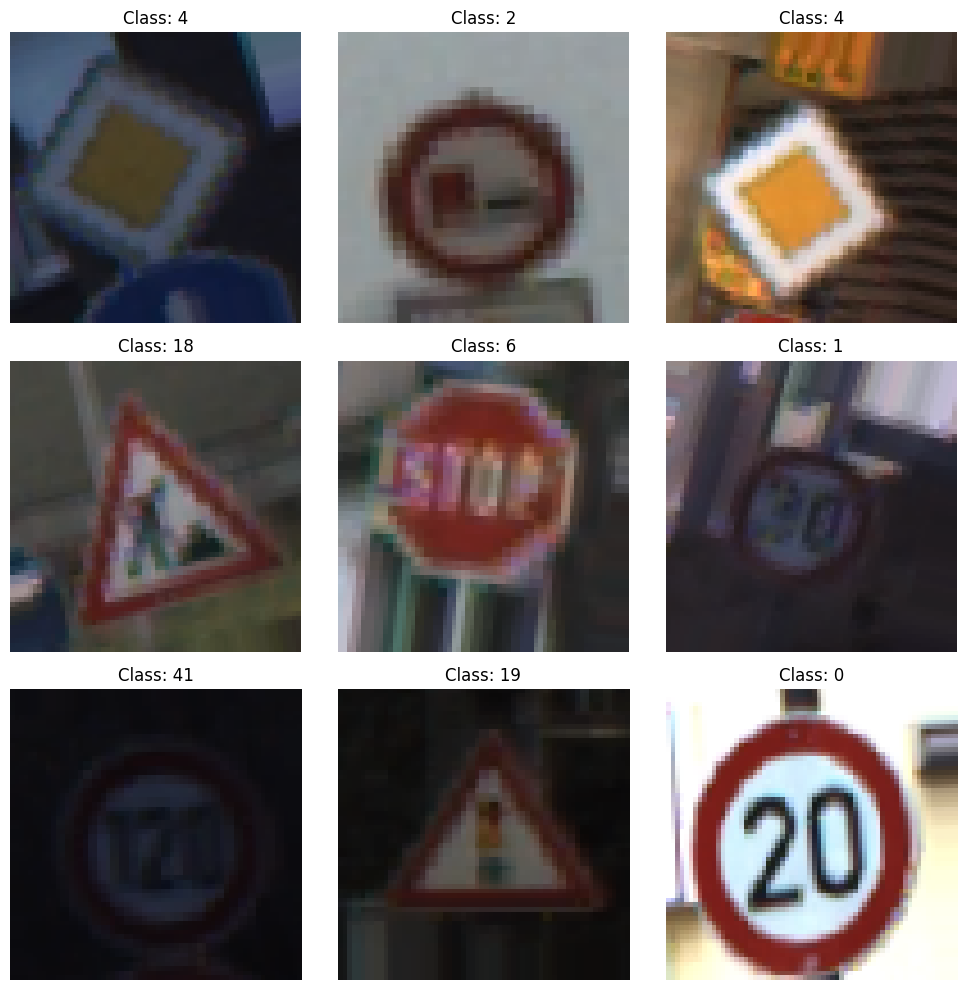

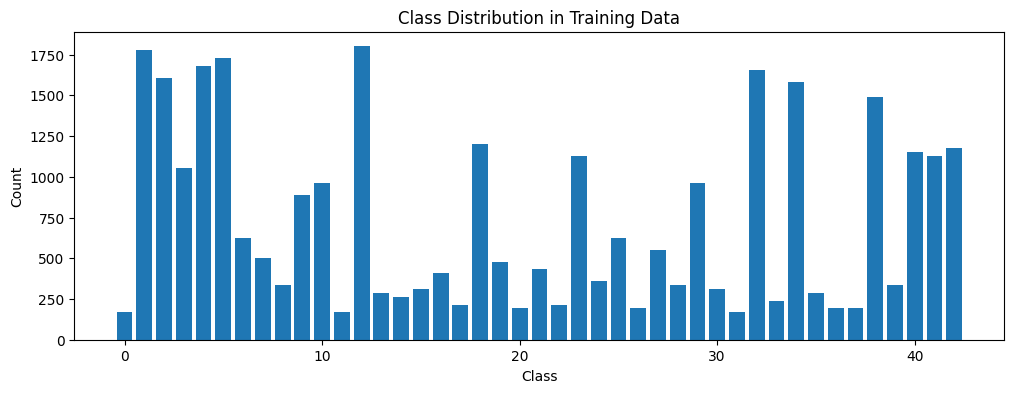

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Show sample images
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {int(labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Class distribution check (important for accuracy)
all_classes = train_generator.classes
class_counts = Counter(all_classes)

plt.figure(figsize=(12, 4))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()